# **Categorical/Categorical Bivariate Analysis**

Learning Outcomes:

LO 1: Students will be able to select, run, and interpret univariate and bivariate statistical analyses and visualizations.


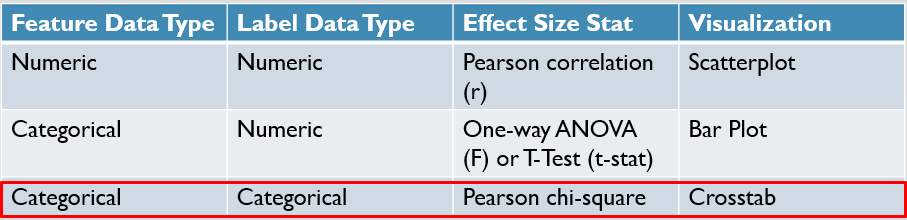

# **Bike Buyers Data**

This data looks at 1000 customers who purchased bikes from a bike company. We want to see if there is a significant relationship between the region the customer is from (Europe, North America, or Pacific) and if that customer purchased a bike (Yes or No).

In [1]:
import pandas as pd

df = pd.read_csv('http://www.ishelp.info/data/bikebuyers_original.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Cars,Age,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,11000,Married,Male,90000,2,0,40,Bachelors,Professional,Yes,1-2 Miles,Pacific,Yes
1,11047,Married,Female,30000,3,2,56,High School,Skilled Manual,No,1-2 Miles,Pacific,Yes
2,11061,Married,Male,80000,2,2,52,Partial College,Skilled Manual,Yes,5-10 Miles,Pacific,Yes
3,11147,Married,Male,60000,2,1,67,Graduate Degree,Management,Yes,0-1 Miles,Pacific,Yes
4,11489,Single,Female,20000,0,2,35,Partial High School,Manual,No,1-2 Miles,Europe,Yes


# **Chi-Square Test of Independence**

**Purpose:** To find out if there is a significant relationship between two categorical variables

We will use the Chi-Square Test of Independence to determine if there is a significant relationship between a customer's region and their purchase choice.

**Null Hypothesis**: A customer's region and their purchase choice **are independent** (i.e., there is no relationship)

**Alternative Hypothesis**: A customer's region and their purchase choice are **not independent** (i.e., a customer's region does have an impact on their purchase choice)

Once we run the Chi-Square test, we will get a p-value that corresponds with the Chi-Square test statistic. If the p-value is less than 0.05, we reject the null hypothesis and accept the alternative hypothesis. If the p-value is less than 0.05, we conclude that **a customer's region does have an impact on their purchase choice.**


Before we run a Chi-Square Test, there are two visualizations that may be helpful to view first:

1. A CrossTab showing the **observed** counts of customer's region and purchase choice

2. A CrossTab showing the **expected** counts of a customer's region and purchase choice assuming there is no relationship between a customer's region and purchase choice

The Chi-Square is calculated based on the difference between the expected frequencies and the observed frequencies. The more the observed count differs from the expected count, the more likely there is a relationship between customer's region and purchase choice.

Thanksfully there is a python package that will calculate the Chi-Square test for us.

# **CrossTab - Observed Counts**

Create a heatmap CrossTab that shows the **observed** (or actual) counts of Purchased Bike and Region.

**Which region has the highest count of individuals that did NOT purchase a bike?**

**Which region has the highest count of individuals that did purchase a bike?**

**How many people in Europe did NOT purchased a bike?**

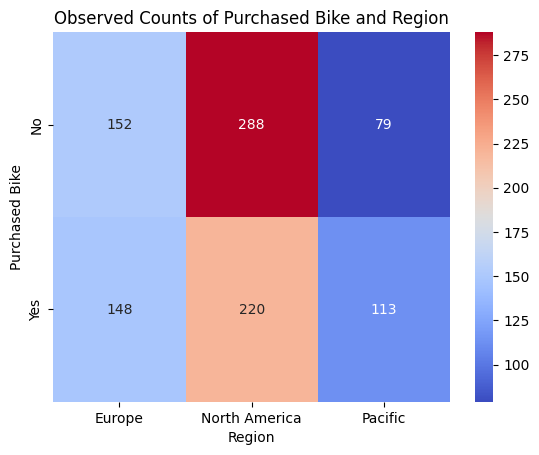

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

crosstab = pd.crosstab(index = df['Purchased Bike'], columns = df['Region'])

plt.title('Observed Counts of Purchased Bike and Region')

sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm')

plt.show()

# **Expected Counts - By Hand**

**How many people in Europe are NOT expected to purchase a bike if there is no relationship between a customer's region and purchase choice?**

**Expected Values = (row total * column total)/grand total**

Expected Values for Europeans that did not purchase a bike = (519 * 300)/1000 = **155.7**

Rounded, about 156 Europeans are not expected to purchase a bike.

**Another way to look at it...**

The Europe Region represents 30% of the data (300/1000). Therefore, if there was absolutely no relationship between Region and Purchased bike, we would expect that 30% of the 519 individuals that did NOT purchase a bike would be from Europe. 519 * .30 = 156. We would expect that 156 individuals did NOT purchase a bike that are from Europe.

The more the observed count differs from the expected amount, the more likely there IS a relationship between Region and Purchased Bike status.

# **CrossTab - Expected Counts**

Create a heatmap CrossTab that shows the **expected** counts of Purchased Bike and Region assuming there is no relationship between a customer's region and purchase choice.


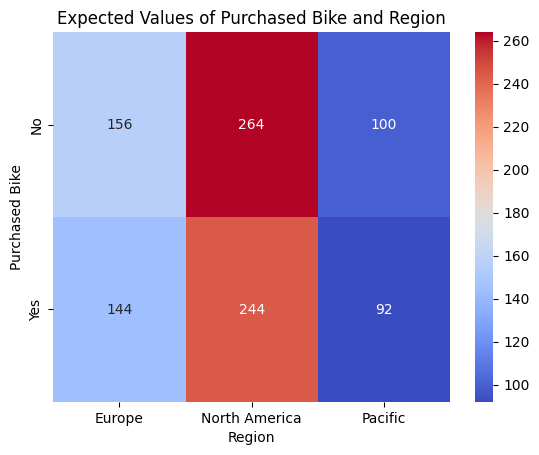

In [4]:
import numpy as np
from scipy.stats import chi2_contingency

# 1 - Create a crosstab with the observed counts (like we did above)
crosstab = pd.crosstab(index = df['Purchased Bike'], columns = df['Region'])

# 2 - Pass the observed crosstab to the chi2_contigency
# This returns 4 values: the chi-square, p-value, degrees of freedom, and expected values
# We will use the chi-square and p-value later. Now we just need the expected values
x, p, dof, expected_values = chi2_contingency(crosstab)

# 3 - Create a dataframe with the expected values
ex_df = pd.DataFrame(np.rint(expected_values).astype('int64'), columns=crosstab.columns, index = crosstab.index )

# 4 - Pass the expected values dataframe to a heatmap
sns.heatmap(ex_df, annot=True,  fmt='d', cmap='coolwarm')

# 5 - Add a title
plt.title('Expected Values of Purchased Bike and Region')

plt.show()

# **Chi-Square**

Pearson's Chi-Square is used to determine whether there is a relationship between two categorical variables. The Chi-Square is based on the difference between the expected frequencies and the observed frequencies.

The chi-square test statistic is a measure of effect size and ranges from 0 to infinity. The higher the chi-square, the stronger the effect size. Like some of the other test statistics we've seen, by itself it's hard to say if the test statistic is 'good' or 'bad'. When we compare it to other chi-square test statistics we can get a better gauge on how strong two categorical variables are related.

If the associated p-value is less than 0.05, we reject the null hypothesis and say there is a statistically significant association between the two categorical variables.

Calculate the Chi-Square for Purchase Bike and Region. **Is there a statistically significant relationship between Region and Purchase Bike choice?**


In [6]:
# 1 - generate the observed crosstab (just like above)
crosstab = pd.crosstab(index = df['Purchased Bike'], columns = df['Region'])

# 2 - pass the observed crosstab to the chi2_contingency (just like above)
x, p, dof, expected_values = chi2_contingency(crosstab)

print('chi-square: ' + str(round(x,4)))
print('p-value: ' + str(round(p, 4)))

chi-square: 13.7524
p-value: 0.001


# **Put it all together - You Try #1**

What's the *observed* count of the number of individuals that own a home and have a partial college education? Visualize the result with a heatmap crosstab showing the *observed* counts of Home Owner and Education.

Is there a statistically significant association between Education and Home Owner status?

# **You Try - #2**

What is the *expected* number of individuals that have a Bachelors education that live in Europe? Visualize the result with a heatmap crosstab showing the *expected* counts of Education and Region. Is there a statistically significant association between Education and Region?

# **Extra Practice - FEMA Data**

FEMA is a federal agency responsible for preparing for and responding to national disasters, man-made incidents, and terrorist events. The dataset below was taken from FEMAs website and contains all federally declared disasters since the first disaster in 1953. You will use this data in your checkpoint to investigate disasters based on their region, decade declared, declaration type and incident type. More info about the dataset can be found here: https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v2

Do the following:

1. Filter the dataset to only include Washington, Idaho, Utah, Florida, Texas, and Maine (if you also want to include the state you are from to see that information, go for it. Your results will just be slightly different than mine.)

Also filter the dataset to only include the following incidentTypes: Volcano, Hurricane, Drought, Fire, and Tornado.

2. Generate both an observed crosstab and an expected crosstab. Is there a statistically significant relationship between state and incident type (using the filtered dataset)?

3. Have you been in a FEMA declared disaster? Or is there one you are curious about? See if you can filter the data to find the record(s) of that disaster.

In [ ]:
df = pd.read_csv('https://www.dropbox.com/s/hp8g2n667un9bfw/DisasterDeclarationsSummaries.csv?dl=1')
pd.set_option('display.max_columns', None)
df.head()